In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [19]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [20]:
data_dir = 'data/alldata/'

# Erstellen Sie eine leere Liste, um DataFrames zu speichern
years = []



#Schleife für die Monate
for year in range(1994,2023):
    dataframes = []
    for month in range(1, 13):
        file = f'NYA_cont_meteorology_{year}-{month:02d}.tab'
        filename = data_dir + file

        comment_lines = 0
        with open(filename, 'r') as file:
            for line in file:
                if line.startswith('*/'):
                    break
                comment_lines += 1
        # Erzeugen des Dateinamens
        

        # Lesen der CSV-Datei für den aktuellen Monat
        df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')

        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
        # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.mean(df['T2 [°C] (average, Thermometer)'])

        # Fügen Sie den DataFrame zur Liste hinzu
        dataframes.append(df)
    years.append(dataframes.copy())





In [51]:
# years[10][1]

# DTR_all = []

# for y in range(len(years)):
#     DTR_year = []
#     for i in range(0,12):
#         #print(str(y)+ '/'+str(i))
#     # Sample temperature data
#         data = years[y][i]['T2 [°C] (average, Thermometer)']

#         df_DTR = pd.DataFrame(columns=['Date', 'DTR'])

#         subset_length = 1440

#         for start in range(0, len(data), subset_length):
#             subset = data.iloc[start:start + subset_length]
#             if np.sum(np.isnan(subset)) < 200:
#                 T_Min = np.min(subset)
#                 T_Max = np.max(subset)
#                 DTR = T_Max - T_Min
#                 date_value = years[y][i]['Date/Time'].iloc[start]  # Assuming you want the date at the start of each subset
#                 df_temp = pd.DataFrame({'Date': [date_value], 'DTR': [DTR]})
#                 df_DTR = pd.concat([df_DTR, df_temp], ignore_index=True)
#         DTR_year.append(df_DTR.copy())
#     DTR_all.append(DTR_year.copy())
#     # Now df_DTR contains the calculated DTR values with corresponding dates



,Date/Time,Height [m],SSD [min] (average),"T10 [°C] (average, Thermometer)","DD10 [deg] (average, Anemometer)","FF10 [m/s] (average, Anemometer)","T2 [°C] (average, Thermometer)","RH [%] (average, redundant measuremen...)","RH [%] (average, redundant measuremen...).1","PoPoPoPo [hPa] (average, Barometer)","SWD OG1 [W/m**2] (average, Pyranometer)","SWD RG8 [W/m**2] (average, Pyranometer)","UV rad [W/m**2] (average, Total Ultraviolet Ra...)"
0,2004-02-01 00:00:00,2,0.0,-10.6,227.3,2.0,-13.0,78.1,76.6,1005.84,-0.7,-0.6,0.0
1,2004-02-01 00:01:00,2,0.0,-10.2,239.9,1.7,-13.1,77.7,77.2,1005.84,-0.7,-0.7,0.0
2,2004-02-01 00:02:00,2,0.0,-10.1,216.0,1.6,-12.0,73.9,72.4,1005.83,-0.4,-0.5,0.0
3,2004-02-01 00:03:00,2,0.0,-9.9,228.7,1.3,-11.3,75.1,73.2,1005.83,0.0,-0.2,0.0
4,2004-02-01 00:04:00,2,0.0,-10.0,227.3,1.5,-11.4,76.5,75.5,1005.84,0.5,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40853,2004-02-29 23:55:00,2,0.0,-16.8,269.5,1.3,-17.6,72.5,71.8,1016.63,0.4,0.2,0.0
40854,2004-02-29 23:56:00,2,0.0,-16.8,262.4,1.3,-17.4,71.5,70.9,1016.64,0.7,0.5,0.0
40855,2004-02-29 23:57:00,2,0.0,-16.6,259.6,1.1,-17.1,70.1,68.9,1016.65,0.8,0.6,0.0
40856,2004-02-29 23:58:00,2,0.0,-16.4,251.2,0.9,-16.9,69.9,69.1,1016.66,0.9,0.7,0.0


(8803.0, 8815.0)

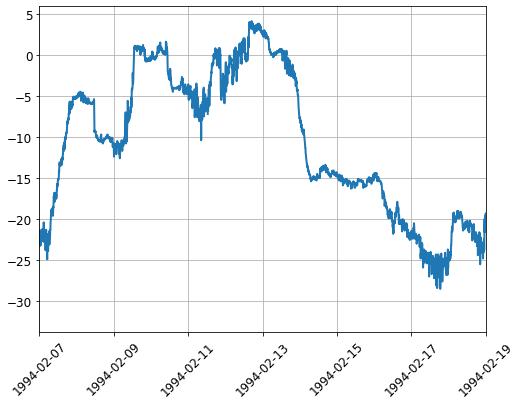

In [49]:
len(years)
plt.plot(years[0][1]['Date/Time'],years[0][1]['T2 [°C] (average, Thermometer)'])
plt.xticks(rotation = 45)
plt.xlim(pd.to_datetime('1994-02-07'), pd.to_datetime('1994-02-19'))

In [23]:
# tagesgang_grad_mean = []

# for i in range(0,12):
#     tagesgang_grad = []
#     for y in range(len(years)):
                   
#         data = years[y][i]['T2 [°C] (average, Thermometer)'] #- np.mean(dataframes[i]['T2 [°C] (average, Thermometer)'])

#         fft = np.fft.fft(data)
#         t = np.arange(len(data))
#         freq = np.fft.fftfreq(t.shape[-1], d = 1/(60*24))
#         #print(len(data))
#         amplitude = 1/ len(data) * np.abs(fft)
#         temp_index = np.where(freq == find_nearest(freq, 1))
#         tagesgang_grad.append(amplitude[temp_index])

#         plt.plot(freq, amplitude)
#         # print(NaNEntries)
#         plt.xlim(-3,3)
#         plt.ylim(0,1)
#         #plt.show()
#     #plt.plot(tagesgang_grad, label = str(i))
#     tagesgang_grad_mean.append(np.mean(tagesgang_grad))


# plt.xlabel('Frequnecy / 1 per day')
# plt.ylabel('amplitude')
# plt.legend()
# tagesgang_grad_mean


In [24]:
# month = ['january', 'february', 'march', 'april','may','june', 'july', 'august', 'september', 'october', 'november', 'december']
# #plt.plot(np.arange(1,13), tagesgang_grad)
# plt.plot(np.arange(1,13), tagesgang_grad_mean, ls = '', marker = 'x', color = 'r')
# # plt.xticks(np.arange(1,13), month, rotation = 45)

# plt.title('Betrag fft parameter Tagesgang')

# #plt.savefig('FourrierParamAvg.pdf')

In [25]:
DTR_all = []

for y in range(len(years)):
    DTR_year = []
    for i in range(0,12):
        #print(str(y)+ '/'+str(i))
    # Sample temperature data
        data = years[y][i]['T2 [°C] (average, Thermometer)']

        df_DTR = pd.DataFrame(columns=['Date', 'DTR'])

        subset_length = 1440

        for start in range(0, len(data), subset_length):
            subset = data.iloc[start:start + subset_length]
            if np.sum(np.isnan(subset)) < 200:
                T_Min = np.min(subset)
                T_Max = np.max(subset)
                DTR = T_Max - T_Min
                date_value = years[y][i]['Date/Time'].iloc[start]  # Assuming you want the date at the start of each subset
                df_temp = pd.DataFrame({'Date': [date_value], 'DTR': [DTR]})
                df_DTR = pd.concat([df_DTR, df_temp], ignore_index=True)
        DTR_year.append(df_DTR.copy())
    DTR_all.append(DTR_year.copy())
    # Now df_DTR contains the calculated DTR values with corresponding dates



In [26]:
DTR_all = []   # List of Lists years in the first layer, month in the second

for y in range(len(years)):
    DTR_year = []
    for i in range(0,12):
        #print(str(y)+ '/'+str(i))
    # Sample temperature data
        data = years[y][i]['T2 [°C] (average, Thermometer)']

        df_DTR = pd.DataFrame(columns=['Date', 'DTR', 'TMin', 'TMax', 'TAvg'])

        subset_length = 1440

        for start in range(0, len(data), subset_length):
            subset = data.iloc[start:start + subset_length]
            if np.sum(np.isnan(subset)) < 200:
                T_Min = np.min(subset)
                T_Max = np.max(subset)
                T_Avg = np.mean(subset)
                DTR = T_Max - T_Min
                date_value = years[y][i]['Date/Time'].iloc[start]  # Assuming you want the date at the start of each subset

                df_temp = pd.DataFrame({'Date': [date_value], 'DTR': [DTR], 'TMin': [T_Min], 'TMax': [T_Max], 'TAvg': [T_Avg]})
                df_DTR = pd.concat([df_DTR, df_temp], ignore_index=True)
        DTR_year.append(df_DTR.copy())
    DTR_all.append(DTR_year.copy())

In [27]:
DTR_all[0][0]

,Date,DTR,TMin,TMax,TAvg
0,1994-01-01 00:00:00,18.0,-25.8,-7.8,-13.754065
1,1994-01-06 00:00:00,14.4,-21.3,-6.9,-12.704175
2,1994-01-11 00:00:00,14.9,-27.2,-12.3,-19.207376
3,1994-01-16 00:15:00,18.6,-21.5,-2.9,-12.815994
4,1994-01-21 00:15:00,22.4,-24.0,-1.6,-12.348430
5,1994-01-26 00:15:00,10.4,-23.7,-13.3,-18.935261
6,1994-01-31 00:15:00,7.3,-13.9,-6.6,-10.411228


In [28]:
# DTR_mean_all = []

# for y in range(len(years)):
#     DTR_mean_year = []
#     for i in range(0,12):
    
#     # Sample temperature data
#         data = DTR_all[y][i]['DTR']
#         temp = np.mean(data)
        
#         DTR_mean_year.append(temp)
#     DTR_mean_all.append(DTR_mean_year.copy())



In [29]:
Data_mean_all = []

for y in range(len(years)):
    DTR_mean_year = []
    for i in range(0,12):
    
    # Sample temperature data
        data = DTR_all[y][i]
        temp = np.mean(data)
        
        DTR_mean_year.append(temp)
    Data_mean_all.append(DTR_mean_year.copy())


DTR_mean_all = []
for y in range(len(years)):
    temp = []
    for m in range(0,12):
        temp.append(Data_mean_all[y][m]['DTR'])
    DTR_mean_all.append(temp.copy())

TAvg_mean_all = []
for y in range(len(years)):
    temp = []
    for m in range(0,12):
        temp.append(Data_mean_all[y][m]['TAvg'])
    TAvg_mean_all.append(temp.copy())

c:\Users\leonh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\leonh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [34]:
Data_Resorted_month = []  # Here first layer month and second layer years

for i in range(0,12):

    DTR_resort_month = []
    for y in range(len(years)):
        temp = Data_mean_all[y][i]
        DTR_resort_month.append(temp)

    Data_Resorted_month.append(DTR_resort_month.copy())

In [35]:
# Data_Resorted_month = []  # Here first layer month and second layer years

# for i in range(0,12):

#     DTR_resort_month = []
#     for y in range(len(years)):
#         temp = DTR_mean_all[y][i]
#         DTR_resort_month.append(temp)

#     Data_Resorted_month.append(DTR_resort_month.copy())


# # DTR_Resorted_month = []
# # for m in range(0,12):
# #     temp = []
# #     for y in range(len(years)):
# #         temp.append(Data_Resorted_month[m][y]['DTR'])
# #     DTR_Resorted_month.append(temp.copy())

# # Tavg_Resorted_month = []
# # for m in range(0,12):
# #     temp = []
# #     for y in range(len(years)):
# #         temp.append(Data_Resorted_month[m][y]['TAvg'])
# #     Tavg_Resorted_month.append(temp.copy())

In [36]:
Data_Resorted_month[0][0]

DTR     15.142857
TMin   -22.485714
TMax    -7.342857
TAvg   -14.310933
dtype: float64

In [37]:

DTR_Resorted_month = []
for m in range(0,12):
    temp = []
    for y in range(len(years)):
        temp.append(Data_Resorted_month[m][y]['DTR'])
    DTR_Resorted_month.append(temp.copy())

Tavg_Resorted_month = []
for m in range(0,12):
    temp = []
    for y in range(len(years)):
        temp.append(Data_Resorted_month[m][y]['TAvg'])
    Tavg_Resorted_month.append(temp.copy())

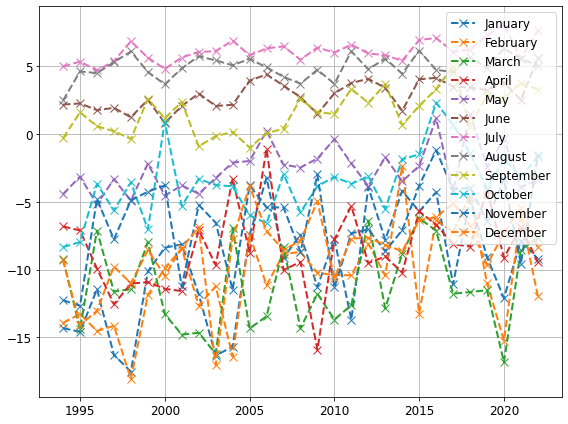

In [38]:
for m in range(0,12):
    plt.plot(x_data_years,Tavg_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()


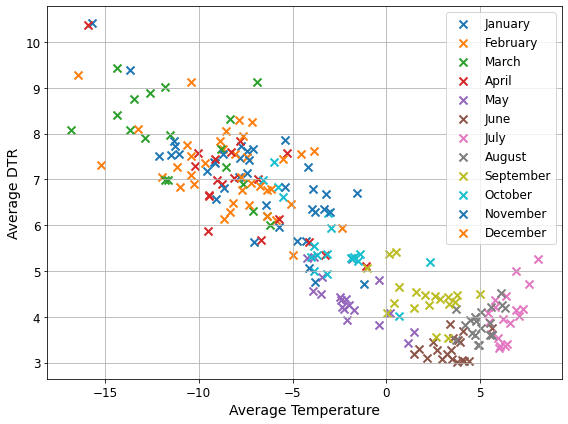

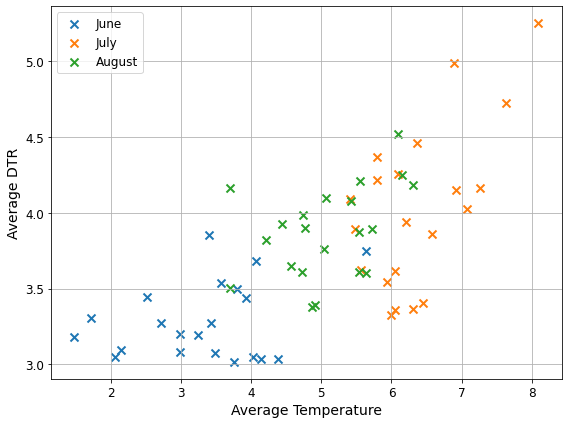

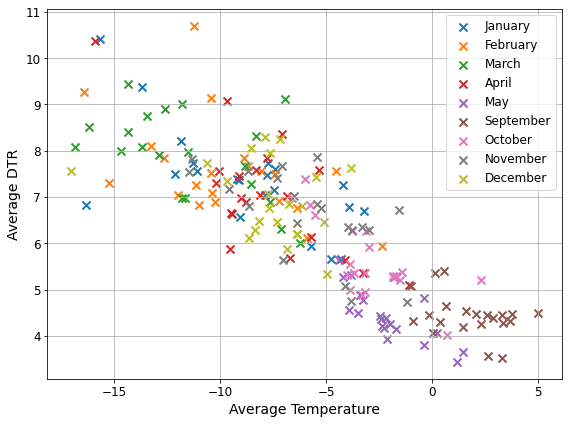

In [45]:
for m in range(0,12):
    plt.scatter(Tavg_Resorted_month[m][10:],DTR_Resorted_month [m][10:], marker = 'x', label = month_label[m])


#plt.xlim(2000,2022)
#plt.ylim(4,10)
plt.xlabel('Average Temperature')
plt.ylabel('Average DTR')

#plt.xlim()

plt.legend()
plt.tight_layout()
plt.show()


for m in range(5,8):
    plt.scatter(Tavg_Resorted_month[m][8:],DTR_Resorted_month [m][8:], marker = 'x', label = month_label[m])


#plt.xlim(2000,2022)
#plt.ylim(4,10)
plt.xlabel('Average Temperature')
plt.ylabel('Average DTR')

#plt.xlim()

plt.legend()
plt.tight_layout()
plt.show()


for m in range(0,5):
    plt.scatter(Tavg_Resorted_month[m][8:],DTR_Resorted_month [m][8:], marker = 'x', label = month_label[m])

for m in range(8,12):
    plt.scatter(Tavg_Resorted_month[m][8:],DTR_Resorted_month [m][8:], marker = 'x', label = month_label[m])

#plt.xlim(2000,2022)
#plt.ylim(4,10)
plt.xlabel('Average Temperature')
plt.ylabel('Average DTR')

#plt.xlim()

plt.legend()
plt.tight_layout()
plt.show()



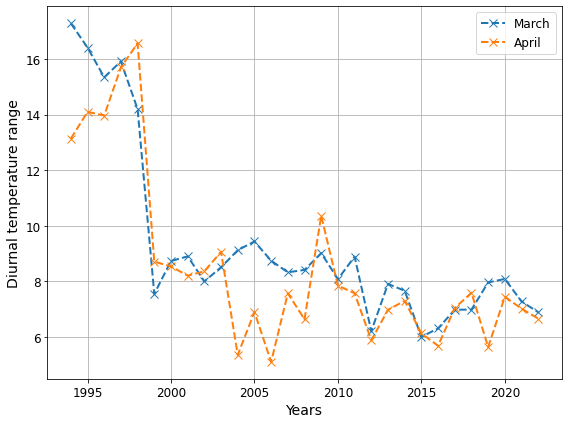

In [40]:
for m in range(2,4):
    plt.plot(x_data_years,DTR_Resorted_month[m], marker = 'x', ls = '--', label = month_label[m])

plt.legend(loc = 1)

plt.xlabel('Years')
plt.ylabel('Diurnal temperature range')
#plt.xlim(2000,2022)
#plt.ylim(4,10)

plt.xlim()
plt.tight_layout()
plt.show()


(array([8797., 8801., 8805., 8809., 8813., 8817., 8821., 8825.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

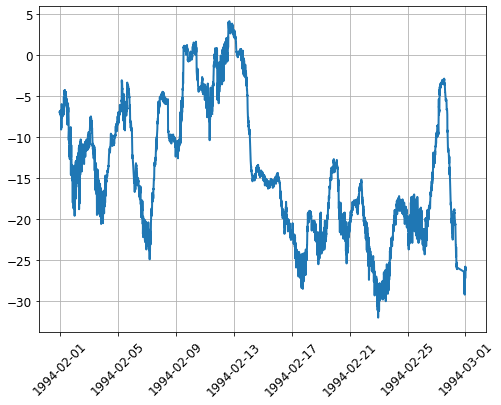

In [41]:

plt.plot(years[0][1]['Date/Time'], years[0][1]['T2 [°C] (average, Thermometer)'])

plt.xticks(rotation = 45)

[15.142857142857144, 20.55, 17.285714285714285, 13.133333333333333, 10.242857142857144, 5.283333333333333, 5.328571428571428, 6.1, 7.150000000000001, 9.771428571428572, 17.166666666666668, 16.914285714285715]


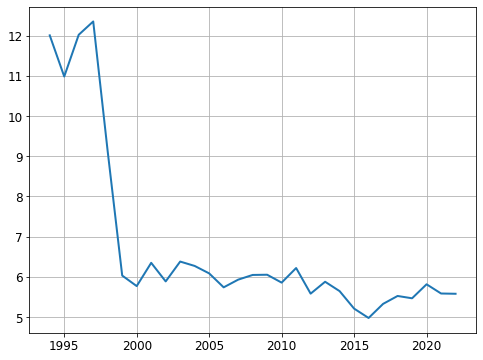

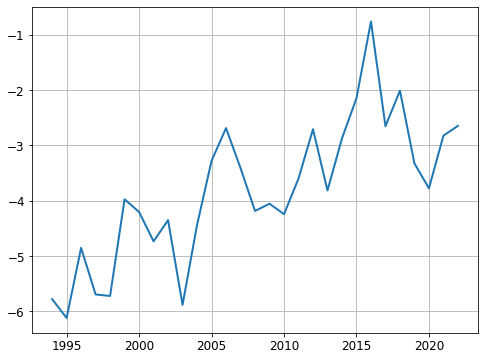

In [42]:
print(DTR_mean_all[0])

DTR_mean_byYear = []
for i in range(len(years)):
    temp = np.mean(DTR_mean_all[i])
    DTR_mean_byYear.append(temp)


plt.plot(x_data_years,DTR_mean_byYear)

plt.show()


TAvg_mean_byYear = []
for i in range(len(years)):
    temp = np.mean(TAvg_mean_all[i])
    TAvg_mean_byYear.append(temp)

plt.plot(x_data_years, TAvg_mean_byYear)

plt.show()
